## Data Manipulation

### Importing Packages

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>,container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### Setting Directory and Reading Data Files

In [ ]:
# Setting the directory and reading the data file
# Folder address where the dataset is saved
path = "/Users/Desktop"
# The file name for the dataset
data_dir = os.path.join(path, 'Crowd Sourced Grocery Prices V2.xlsx')
# The name of the file will be created
data_output = os.path.join(path, 'Crowd Sourced Grocery Prices.xlsx')

In [4]:
df = pd.ExcelFile(data_dir)
df.sheet_names

['Observations', 'Products']

### Exploring Dataset

In [5]:
df_observation = pd.read_excel(data_dir, sheet_name='Observations',date_parser=True)

In [6]:
df_observation.head()

,Country,City,Obs Date,Product Code,Quantity,Price
0,Kenya,Eldoret,2009-01-01 00:00:00,52.0,1 kg,11.92
1,Pakistan,Attock,2009-01-01 00:00:00,44.0,1 kg,9.36
2,India,Nashik,2009-01-01 00:00:00,47.0,1 kg,6.47
3,Kenya,Eldoret,2009-01-01 00:00:00,52.0,1 kg,5.91
4,India,Nashik,2009-01-01 00:00:00,62.0,100 g,1.80


In [7]:
df_products = pd.read_excel(data_dir, sheet_name='Products')

In [8]:
df_products.head()

,Product Code,Product Name
0,11,"Rice, long grain"
1,12,"Rice, white"
2,13,"Cornflakes, Kellogg's"
3,14,"Flour, wheat"
4,15,"Flour, maize"


### Data Preparation

In [9]:
df_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961797 entries, 0 to 961796
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       961732 non-null  object 
 1   City          961732 non-null  object 
 2   Obs Date      961732 non-null  object 
 3   Product Code  961732 non-null  float64
 4   Quantity      961732 non-null  object 
 5   Price         931766 non-null  float64
dtypes: float64(2), object(4)
memory usage: 44.0+ MB


In [10]:
df_observation.isnull().sum()

Country            65
City               65
Obs Date           65
Product Code       65
Quantity           65
Price           30031
dtype: int64

In [11]:
df_observation.dropna(axis = 0,subset=['Country', 'City', 'Obs Date', 'Product Code', 'Quantity'],inplace= True)

In [12]:
df_observation.isnull().sum()

Country             0
City                0
Obs Date            0
Product Code        0
Quantity            0
Price           29966
dtype: int64

In [ ]:
# Products sheet
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Code  30 non-null     int64 
 1   Product Name  30 non-null     object
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [14]:
df_products.isnull().sum()

Product Code    0
Product Name    0
dtype: int64

### Imputing Blank Cells

As you can see, many rows have missing values in the Price. Since the total number of missing values exceed 2% of the entire dataset, I cannot delete the rows.

In order to clean the data, I will impute values into the blank cells. Imputing means i'm estimating the values that should have been present in the blank cells and inserting them. 

The method to be used for imputation is determined by looking at a histogram. A normal distribution adopts the mean value for imputation. A skewed histogram suggests adopting the median as the method for imputation.

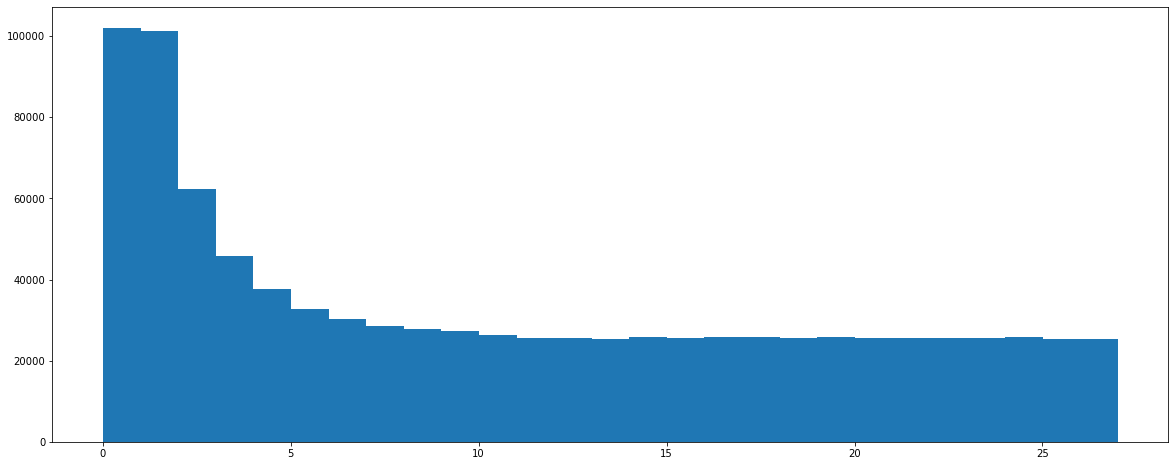

Mean - 10.563621484227882
Median - 8.91


In [15]:
plt.figure(figsize = (20,8))
plt.hist(df_observation.Price,bins = 27)
plt.show()
print("Mean - " + str(df_observation.Price.mean()))
print("Median - " + str(df_observation.Price.median()))

In [22]:
df_observation.Price.fillna(df_observation.Price.mean(),inplace = True)

Use the Histogram to choose the appropriate mean imputing method for distribution and replace the null values in price with imputed values.

In [23]:
# Check the number of null values that are present
df_observation.isna().sum()

Country         0
City            0
Obs Date        0
Product Code    0
Quantity        0
Price           0
dtype: int64

Correct the names for countries with spelling errors and duplicate entries to ensure only one record exists for each country.

In [24]:
# List the unique values in the country column 
list(df_observation.Country.unique())

['Kenya',
 'Pakistan',
 'India',
 'Bangladesh',
 'Indonesia',
 'Nigeria',
 'Philippines',
 'Brazil',
 'Brazel',
 'Indonseia',
 'Phillippines']

In [31]:
# Remove spelling errors using map()
df_observation.Country = df_observation.Country.map({'Kenya':'Kenya',
 'Pakistan':'Pakistan',
 'India':'India',
 'Bangladesh':'Bangladesh',
 'Indonesia':'Indonesia',
 'Nigeria':'Nigeria',
 'Philippines':'Philippines',
 'Brazil':'Brazil',
 'Brazel':'Brazil',
 'Indonseia':'Indonesia',
 'Phillippines':'Philippines'})

In [32]:
list(df_observation.Country.unique())

['Kenya',
 nan,
 'India',
 'Bangladesh',
 'Indonesia',
 'Nigeria',
 'Philippines',
 'Brazil']

In [33]:
# Check for duplicate entries
df_observation.duplicated().sum()

14397

In [ ]:
# Create a dataframe to check for duplicate rows
df_obj = pd.DataFrame(df_observation)

In [ ]:
# Select duplicate rows except first occurrence based on all columns
duplicate_rows= df_obj[df_obj.duplicated()]

print("Duplicate rows except first occurrence based on all columns are:")
print(duplicate_rows)

Duplicate rows except first occurrence based on all columns are :
           Country        City             Obs Date  Product Code Quantity  \
121            NaN    Sargodha  2009-01-20 00:00:00          44.0     1 kg   
127            NaN  Gujranwala  2009-01-20 00:00:00          44.0     1 kg   
130            NaN    Sargodha  2009-01-20 00:00:00          52.0     1 kg   
131            NaN  Gujranwala  2009-01-20 00:00:00          52.0     1 kg   
141            NaN     Karachi                39834          44.0     1 kg   
...            ...         ...                  ...           ...      ...   
961079     Nigeria       Abuja  2009-03-29 00:00:00          22.0     1 kg   
961146       Kenya     Nairobi  2009-04-22 00:00:00          23.0     1 kg   
961159       Kenya     Nairobi  2009-04-24 00:00:00          24.0     1 kg   
961424  Bangladesh       Dhaka  2009-04-06 00:00:00          24.0     1 kg   
961437  Bangladesh       Dhaka  2009-03-28 00:00:00          24.0     1 kg  

In [36]:
# Remove the duplicates from the dataframe
df_observation.drop_duplicates(subset=df_observation.columns,inplace=True)

In [37]:
# Check the number of duplicate entries present
df_observation.duplicated().sum()

0

In [ ]:
# Merging both datasets 
df_full = pd.merge(df_observation,df_products, how = 'outer')

In [ ]:
# Sort the entire file by country column
df_full.sort_values(by = 'Country',inplace = True)
df_full.head()

,Country,City,Obs Date,Product Code,Quantity,Price,Product Name
0,Kenya,Eldoret,2009-01-01 00:00:00,52.0,1 kg,11.92,Cooking salt
1,Kenya,Eldoret,2009-01-01 00:00:00,52.0,1 kg,5.91,Cooking salt
2,Kenya,Eldoret,2009-01-02 00:00:00,52.0,1 kg,16.50,Cooking salt
3,Kenya,Eldoret,2009-01-02 00:00:00,52.0,1 kg,9.77,Cooking salt
4,NaN,Rawalpindi,2009-01-03 00:00:00,52.0,1 kg,17.80,Cooking salt


Datasets are formatted and cleaned all the duplicates. Export the cleaned datasets to an Excel file for data exploratory and data visulization.

In [41]:
# Select specific columns to export
df_full.to_excel(data_output,columns=['Country', 'City', 'Obs Date', 'Product Code', 'Quantity', 'Price', 'Product Name'])

In [42]:
path = "/Users/thienla/Desktop/Data Cleaning"
data_dir = os.path.join(path, 'Crowd Sourced Grocery Prices V2.xlsx')
data_output = os.path.join(path, 'Crowd Sourced Grocery Prices.xlsx')